It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## About dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problem statement
To predict whether transaction is fraud (class 1) or not (class 0)

## Import necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Explore data

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

1081

## Observation
* There are nearly 3 lakh rows and 31 columns in the dataset.
* All the columns are numerical.
* There are no missing values.
* There are some duplicates. I will drop them in data preprocessing step.

## Data preprocessing: Dropping duplicates

In [7]:
df.drop_duplicates(inplace=True)
# View changed shape
df.shape

(283726, 31)

## Data visualization

As features V1 to V28 are PCA transformed, I will visualize only Time, Amount and Class features.

<AxesSubplot:xlabel='Time', ylabel='Density'>

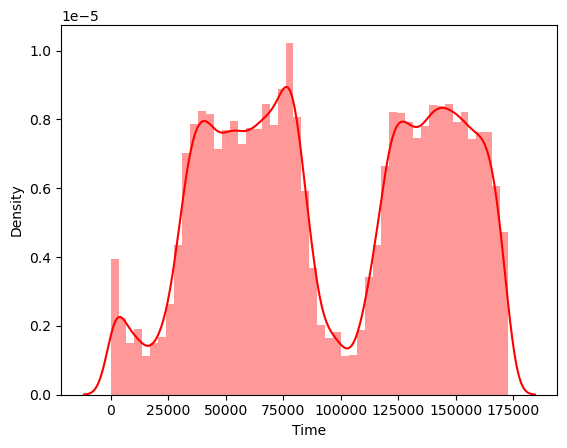

In [8]:
sns.distplot(df['Time'], color = 'red')

<AxesSubplot:xlabel='Amount'>

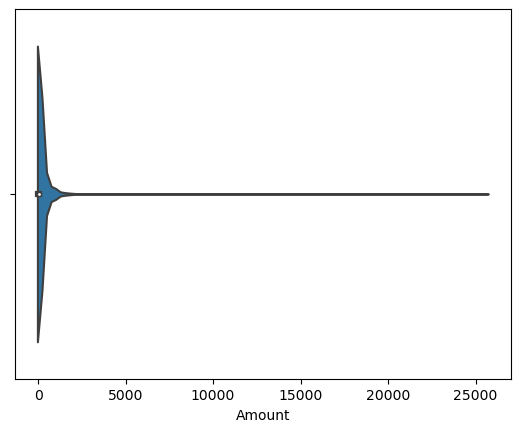

In [9]:
sns.violinplot(df['Amount'])

There are many outliers in the data. The fraud amount is less than 100 euros.

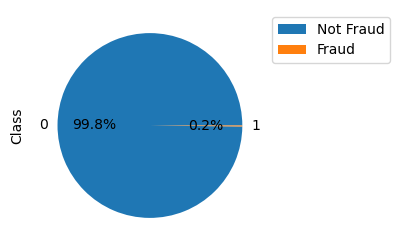

In [10]:
plt.figure(figsize=(3,3))
df['Class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.legend(['Not Fraud','Fraud'], bbox_to_anchor = (1,1))
plt.show()

Only 0.2% fraud data is present.

## Building model: Logistic Regression

In [11]:
# Define x & y
x = df.iloc[:,:-1]
y = df['Class']

In [12]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state=34)

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain) 
xtest = ss.transform(xtest)

In [14]:
# Initializing model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Fitting training data
lr.fit(xtrain, ytrain)

LogisticRegression()

In [15]:
# Prediction
ypred = lr.predict(xtest)

In [16]:
# Evaluating model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy of the model is {}%.'.format(round(accuracy_score(ytest, ypred)*100, 2)))
print('----------------------------------------------------------------')
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('----------------------------------------------------------------')
print('Classification Report: \n', classification_report(ytest, ypred))

Accuracy of the model is 99.93%.
----------------------------------------------------------------
Confusion Matrix: 
 [[84975     8]
 [   54    81]]
----------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84983
           1       0.91      0.60      0.72       135

    accuracy                           1.00     85118
   macro avg       0.95      0.80      0.86     85118
weighted avg       1.00      1.00      1.00     85118



* ### AUC-ROC curve

In [17]:
# Finding probabilities
ypredprob = lr.predict_proba(xtest)

In [18]:
# Setting threshold
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(ytest,ypredprob[:,1])

Text(0.5, 1.0, 'ROC Curve')

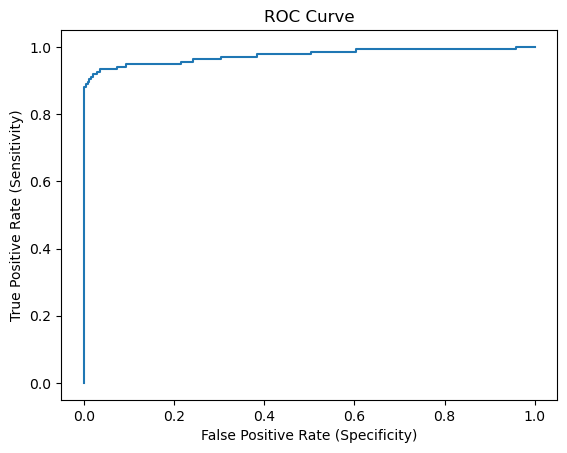

In [19]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")

### Accuracy of the model is 99% !!